In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Multi Layer Perceptron
The below class is systematic approach for implementing ANN. The following methods are being implemented in the class MLP()\
* split_samples(); This shuffles and splits the dataset into Training data and Validation data
* initialise_params(); This method initializes weights and biases with random number
* sigmoid(); This method computes sigmoid for a given input
* forward_prop(); This method defines forward propagation of the desired NN
* predict_for_valid(); This method is similar to forward_prop(), but just does'nt update the attribuites of class
* predict(); This method is same as predict_for_valid(), but threshould the output to given boolean output
* train_loss() & valid_loss(); These methods computes the Loss for the given X and Y
* back_prop(); This method computes gradients to be updated while in training
* update_params(); Updates the gradients
* train(); Use above method to train the network and save losses at each epoch
* plot(); Plots the losses against number of epochs
* print_params(); Prints the learnt weights and biases

In [2]:
class MLP():
    def __init__(self, X, Y, learning_rate=0.05, validation_split=None):
        self.X = X
        self.Y = Y
        self.X_train = self.X_valid = self.Y_train = self.Y_valid = None
        self.lr = learning_rate
        self.validation_split = validation_split
        self.W1 = self.W2 = self.b1 = self.b2 = self.z1 = self.z2 = self.A1 = self.A2 = None
        self.dW1 = self.dW2 = self.db1 = self.db2 = self.dz1 = self.dz2 = None
        self.training_loss = self.validation_loss = None
    
    def split_samples(self):
        indices = np.arange(N)
        np.random.shuffle(indices)
        x = self.X[:, indices]
        y = self.Y[:, indices]
        vs = 0
        m = self.X.shape[1]
        if self.validation_split is not None:
            vs = int(self.validation_split*m)
        self.X_train = x[:, 0:(m-vs)]
        self.Y_train = y[:, 0:(m-vs)]
        self.X_valid = x[:, (m-vs):]
        self.Y_valid = y[:, (m-vs):]
        print("-> Total samples = {}\n-> Training samples = {}\n-> Validation samples = {}".format(int(m), int(m)-vs, vs))
        
        
    def initialise_params(self):
        self.W1 = np.random.randn(2, 2)
        self.b1 = np.random.randn(2, 1)
        
        self.W2 = np.random.randn(1, 2)
        self.b2 = np.random.randn(1, 1)

    def sigmoid(self, x):
        return 1/(1 + np.exp(-1*x))
        
    def forward_prop(self, X):
        self.z1 = self.W1@X + self.b1
        self.A1 = self.sigmoid(self.z1)
        
        self.z2 = self.W2@self.A1 + self.b2
        self.A2 = self.sigmoid(self.z2)
    
    def predict_for_valid(self, X):
        z1 = self.W1@X + self.b1
        A1 = self.sigmoid(z1)
        
        z2 = self.W2@A1 + self.b2
        A2 = self.sigmoid(z2)
        return A2
    
    def predict(self, X):
        z1 = self.W1@X + self.b1
        A1 = self.sigmoid(z1)
        
        z2 = self.W2@A1 + self.b2
        A2 = self.sigmoid(z2)
        A2[A2 >= 0.5] = 1
        A2[A2 < 0.5] = 0
        return A2
    
    def train_loss(self, Y):
        return np.sum(np.power(Y - self.A2, 2))
    
    def valid_loss(self, X, Y):
        Y_hat = self.predict_for_valid(X)
        return np.sum(np.power(Y - Y_hat, 2))
    
    def back_prop(self, X, Y):
        self.dz2 = self.A2*(1 - self.A2) * 2*(self.A2 - Y)
        self.dW2 = self.dz2 @ self.A1.T
        self.db2 = np.sum(self.dz2, axis=1, keepdims=True)
        
        self.dz1 = (self.W2.T @ self.dz2) * (self.A1*(1 - self.A1))
        self.dW1 = self.dz1 @ X.T
        self.db1 = np.sum(self.dz1, axis=1, keepdims=True)
    
    def update_params(self):
        self.W1 -= self.lr * self.dW1
        self.W2 -= self.lr * self.dW2
        self.b1 -= self.lr * self.db1
        self.b2 -= self.lr * self.db2
    
    def train(self, epochs=1, mini_batch_size=1, verbose=True):
        
        self.epoch = epochs 
        
        self.split_samples()
        
        self.training_loss = np.zeros((1, epochs))
        self.validation_loss = np.zeros((1, epochs))
        
        N_mini_batch_size = int(self.X_train.shape[1] / mini_batch_size)
        
        self.initialise_params()
        
        for i in range(epochs):
            for j in range(N_mini_batch_size-1):
                X = self.X_train[:, (j)*mini_batch_size : (j+1)*mini_batch_size]
                Y = self.Y_train[:, (j)*mini_batch_size : (j+1)*mini_batch_size]
                
                self.forward_prop(X)
                
                self.training_loss[0, i] += (self.train_loss(Y))
                self.validation_loss[0, i] += (self.valid_loss(self.X_valid, self.Y_valid))
                
                self.back_prop(X, Y)
                
                self.update_params()
                
            X = self.X_train[:, (-1*N_mini_batch_size) :]
            Y = self.Y_train[:, (-1*N_mini_batch_size) :]

            self.forward_prop(X)

            self.training_loss[0, i] += (self.train_loss(Y))
            self.validation_loss[0, i] += (self.valid_loss(self.X_valid, self.Y_valid))

            self.back_prop(X, Y)

            self.update_params()  
            if verbose:
                print("Epoch {} :- Training Loss is {}, Validation Loss is {}".format(i+1, self.training_loss[0, i], self.validation_loss[0, i]))

    def plot(self):
        plt.figure()
        plt.xlabel("epoch")
        plt.ylabel("MSE")
        plt.semilogy(np.arange(self.epoch), self.training_loss.reshape(self.epoch, ), label="Training")
        plt.semilogy(np.arange(self.epoch), self.validation_loss.reshape(self.epoch, ), label="Validation")
        plt.legend()
        plt.show()
    
    def print_params(self):
        print("########### Hidden layer #########")
        print("[w11={:.3f} w12={:.3f}]\n[w21={:.3f} w22={:.3f}]".format(self.W1[0, 0], self.W1[0, 1], self.W1[1, 0], self.W1[1, 1]))
        print("[b1={:.3f} b2={:.3f}]".format(self.b1[0, 0], self.b1[1, 0]))
        print("\n")
        print("########## Output layer ##########")
        print("[w1={:.3f} w2={:.3f}]".format(self.W2[0, 0], self.W2[0, 1]))
        print("[b={:.3f}]".format(self.b2[0, 0]))

# Generating dataset

In [3]:
def generate_samples(N, operation):
    var = 0.01
    X = np.zeros((2, N))
    X[:, 0:4] = np.matrix([[0, 0, 1, 1], [0, 1, 0, 1]])
    Y = np.zeros((1, N))
    
    if(operation == "XOR"):
        Y[0, 0:4] = np.array([0, 1, 1, 0])
    elif(operation == "AND"):
        Y[0, 0:4] = np.array([0, 0, 0, 1])
    elif(operation == "OR"):
        Y[0, 0:4] = np.array([0, 1, 1, 1])
    
    for i in range(4, N):
        X[0, i] = X[0, i%4] + np.sqrt(var)*np.random.randn()
        X[1, i] = X[1, i%4] + np.sqrt(var)*np.random.randn()
        Y[0, i] = Y[0, i%4]
    
    indices = np.arange(N)
    np.random.shuffle(indices)
    x = X[:, indices]
    y = Y[:, indices]
    return x, y

In [4]:
N = 1000
X_xor, Y_xor = generate_samples(N, "XOR")
XOR = MLP(X_xor, Y_xor, validation_split = 0.2)

## Visulisation of input data

In [5]:
plt.figure()
plt.grid()
plt.plot(X_xor[0, :], X_xor[1, :], "bo")
plt.plot(1, 1, "go")
plt.plot(1, 0, "go")
plt.plot(0, 0, "go")
plt.plot(0, 1, "go")

## Training for XOR

In [6]:
%%time
XOR.train(epochs=100, mini_batch_size=64)

-> Total samples = 1000
-> Training samples = 800
-> Validation samples = 200
Epoch 1 :- Training Loss is 184.14821393551358, Validation Loss is 613.0104886755772
Epoch 2 :- Training Loss is 179.23731362401895, Validation Loss is 603.470063305691
Epoch 3 :- Training Loss is 179.0683873727856, Validation Loss is 603.4266233504818
Epoch 4 :- Training Loss is 178.84769613332094, Validation Loss is 603.1870781686666
Epoch 5 :- Training Loss is 178.5268548299254, Validation Loss is 602.619533339662
Epoch 6 :- Training Loss is 178.0280660995124, Validation Loss is 601.4951193238176
Epoch 7 :- Training Loss is 177.23115586409764, Validation Loss is 599.4437308263642
Epoch 8 :- Training Loss is 175.97214466099842, Validation Loss is 595.9452335576228
Epoch 9 :- Training Loss is 174.0708466494358, Validation Loss is 590.4171263678325
Epoch 10 :- Training Loss is 171.38438178905122, Validation Loss is 582.3913017589309
Epoch 11 :- Training Loss is 167.85378930202342, Validation Loss is 571.66644

# Plots of training and validation losses

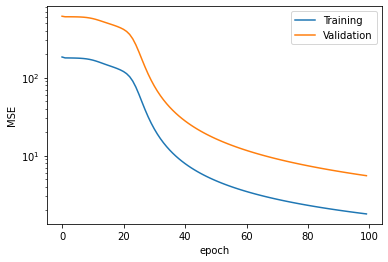

In [7]:
XOR.plot()

# Predictions

In [8]:
test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).reshape(2, 4)
y_test = XOR.predict_for_valid(test).reshape(-1, )
pd.DataFrame({"A":test[0, :], "B":test[1, :], "Output":y_test, "Threshould":(y_test>0.5).astype(int)}).head()

A  B    Output  Threshould
0  0  1  0.977758           1
1  0  0  0.029252           0
2  0  1  0.977758           1
3  1  1  0.031119           0

# Learnt parameters

In [9]:
XOR.print_params()

########### Hidden layer #########
[w11=6.543 w12=6.273]
[w21=4.536 w22=4.202]
[b1=-3.134 b2=-6.753]


########## Output layer ##########
[w1=8.677 w2=-9.396]
[b=-3.853]


## Training with different number of samples to observe performance difference

In [10]:
# N=2500
X_xor_1, Y_xor_1 = generate_samples(2500, "XOR")
XOR_1 = MLP(X_xor_1, Y_xor_1, validation_split = 0.2)
XOR_1.train(epochs=100, mini_batch_size=64, verbose=False)

# N=5000
X_xor_2, Y_xor_2 = generate_samples(5000, "XOR")
XOR_2 = MLP(X_xor_2, Y_xor_2, validation_split = 0.2)
XOR_2.train(epochs=100, mini_batch_size=64, verbose=False)

-> Total samples = 2500
-> Training samples = 2000
-> Validation samples = 500
-> Total samples = 5000
-> Training samples = 4000
-> Validation samples = 1000


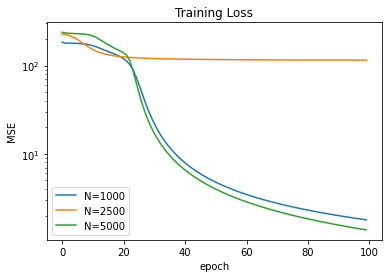

In [11]:
E = np.arange(100)

plt.figure()
plt.title("Training Loss")
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.semilogy(E, XOR.training_loss.reshape(100, ), label="N=1000")
plt.semilogy(E, XOR_1.training_loss.reshape(100, ), label="N=2500")
plt.semilogy(E, XOR_2.training_loss.reshape(100, ), label="N=5000")
plt.legend()

# Training for AND

In [12]:
N = 1000
X_and, Y_and = generate_samples(N, "AND")
AND = MLP(X_and, Y_and, validation_split = 0.2)

In [13]:
%%time
AND.train(epochs=100, mini_batch_size=64)

-> Total samples = 1000
-> Training samples = 800
-> Validation samples = 200
Epoch 1 :- Training Loss is 136.81487410735957, Validation Loss is 464.2365870736777
Epoch 2 :- Training Loss is 131.30541321336943, Validation Loss is 439.13685276354374
Epoch 3 :- Training Loss is 127.59196798832322, Validation Loss is 423.5291715817951
Epoch 4 :- Training Loss is 123.32438058890364, Validation Loss is 405.8465165631777
Epoch 5 :- Training Loss is 118.55330585790105, Validation Loss is 386.3538757670983
Epoch 6 :- Training Loss is 113.55971978744184, Validation Loss is 366.3211739820954
Epoch 7 :- Training Loss is 108.77966760062391, Validation Loss is 347.5405485918512
Epoch 8 :- Training Loss is 104.50406999713083, Validation Loss is 331.0992046043063
Epoch 9 :- Training Loss is 100.65700929994158, Validation Loss is 316.64703178134863
Epoch 10 :- Training Loss is 96.70664997031085, Validation Loss is 302.2352689653591
Epoch 11 :- Training Loss is 91.17079502120149, Validation Loss is 282

Wall time: 287 ms


# Visualisation of loss against number of epochs

In [14]:
AND.plot()

# Predictions

In [15]:
test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).reshape(2, 4)
y_test = AND.predict_for_valid(test).reshape(-1, )
pd.DataFrame({"A":test[0, :], "B":test[1, :], "Output":y_test, "Threshould":(y_test>0.5).astype(int)}).head()

A  B    Output  Threshould
0  0  1  0.015567           0
1  0  0  0.006116           0
2  0  1  0.015567           0
3  1  1  0.976894           1

## Training with different number of samples to observe performance difference

In [16]:
# N=2500
X_and_1, Y_and_1 = generate_samples(2500, "AND")
AND_1 = MLP(X_and_1, Y_and_1, validation_split = 0.2)
AND_1.train(epochs=100, mini_batch_size=64, verbose=False)

# N=5000
X_and_2, Y_and_2 = generate_samples(5000, "AND")
AND_2 = MLP(X_and_2, Y_and_2, validation_split = 0.2)
AND_2.train(epochs=100, mini_batch_size=64, verbose=False)

-> Total samples = 2500
-> Training samples = 2000
-> Validation samples = 500
-> Total samples = 5000
-> Training samples = 4000
-> Validation samples = 1000


In [17]:
E = np.arange(100)

plt.figure()
plt.title("Training Loss")
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.semilogy(E, AND.training_loss.reshape(100, ), label="N=1000")
plt.semilogy(E, AND_1.training_loss.reshape(100, ), label="N=2500")
plt.semilogy(E, AND_2.training_loss.reshape(100, ), label="N=5000")
plt.legend()

# Training OR

In [18]:
N = 1000
X_or, Y_or = generate_samples(N, "OR")
OR = MLP(X_or, Y_or, validation_split = 0.2)

In [19]:
%%time
OR.train(epochs=100, mini_batch_size=64)

-> Total samples = 1000
-> Training samples = 800
-> Validation samples = 200
Epoch 1 :- Training Loss is 156.976189392569, Validation Loss is 453.70419389800014
Epoch 2 :- Training Loss is 144.74765139633175, Validation Loss is 421.901694912221
Epoch 3 :- Training Loss is 138.98939082477472, Validation Loss is 407.56571436549166
Epoch 4 :- Training Loss is 134.56832731369258, Validation Loss is 396.4912646007666
Epoch 5 :- Training Loss is 128.51110853998296, Validation Loss is 381.38868578167484
Epoch 6 :- Training Loss is 118.30494389247858, Validation Loss is 355.25854679970263
Epoch 7 :- Training Loss is 99.87934211808374, Validation Loss is 304.2608285257794
Epoch 8 :- Training Loss is 70.17116687813345, Validation Loss is 217.82764117844306
Epoch 9 :- Training Loss is 43.44031759827919, Validation Loss is 138.76060284531843
Epoch 10 :- Training Loss is 28.130877015485556, Validation Loss is 92.01010321310616
Epoch 11 :- Training Loss is 19.812996380426586, Validation Loss is 65.

# Visulisation of losses against number of epochs

In [20]:
OR.plot()

# Predictions

In [21]:
test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).reshape(2, 4)
y_test = OR.predict_for_valid(test).reshape(-1, )
pd.DataFrame({"A":test[0, :], "B":test[1, :], "Output":y_test, "Threshould":(y_test>0.5).astype(int)}).head()

A  B    Output  Threshould
0  0  1  0.983793           1
1  0  0  0.015701           0
2  0  1  0.983793           1
3  1  1  0.992160           1

## Training with different number of samples to observe performance difference

In [22]:
# N=2500
X_or_1, Y_or_1 = generate_samples(2500, "OR")
OR_1 = MLP(X_or_1, Y_or_1, validation_split = 0.2)
OR_1.train(epochs=100, mini_batch_size=64, verbose=False)

# N=5000
X_or_2, Y_or_2 = generate_samples(5000, "OR")
OR_2 = MLP(X_or_2, Y_or_2, validation_split = 0.2)
OR_2.train(epochs=100, mini_batch_size=64, verbose=False)

-> Total samples = 2500
-> Training samples = 2000
-> Validation samples = 500
-> Total samples = 5000
-> Training samples = 4000
-> Validation samples = 1000


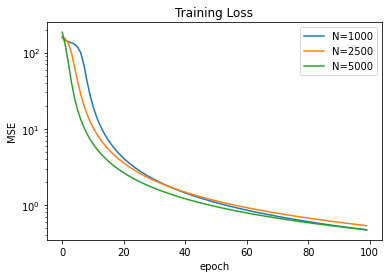

In [23]:
E = np.arange(100)

plt.figure()
plt.title("Training Loss")
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.semilogy(E, OR.training_loss.reshape(100, ), label="N=1000")
plt.semilogy(E, OR_1.training_loss.reshape(100, ), label="N=2500")
plt.semilogy(E, OR_2.training_loss.reshape(100, ), label="N=5000")
plt.legend()